# Coursera Capstone Project

## The Battle of Neighborhoods - Week 2

#### *RIZA YILDIRIM*

<br>

### Uploading Libraries

In [1]:
!conda update -n base -c defaults conda --y
!conda install -c conda-forge geopy --y
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c anaconda beautifulsoup4 --y
!conda install -c anaconda lxml --y

import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import random # library for random number generation
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from folium import plugins
print('Libraries imported.')
print('Folium installed')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs: 
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tqdm-4.40.2                |             py_0          53 KB
    conda-package-handling-1.6.0|   py37h7b6447c_0         872 KB
    conda-4.8.0                |           py37_1         3.0 MB
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

    conda-package-handling: 1.6.0-py37h7b6447c_0
    tqdm:                   4.40.2-py_0         

The following packages will be UPDATED:

    conda:                  4.5.12-py37_0        --> 4.8.0-py37_1


tqdm-4.40.2          | 53 KB     | ##################################### | 100% 
conda-package-handli | 872 KB    | ###################################

## REPORT

### Content

1. Introduction Section:
   
    1.1 Discussion of the "backgroung situation" leading to the problem at hand
   
    1.2 Problem to be resolved
   
    1.3 Audience for this project
 

2. Data Section:

    2.1 Data of Current Situation (current residence place)
 
    2.2 Data required to resolve the problem
 
    2.3 Data sources and data manipulation


3. Methodology section :

    3.1 Process steps and strategy to resolve the problem

    3.2 Data Science Methods, machine learing, mapping tools and exploratory data analysis


4. Results section

    Discussion of the results and how they help to take a decision


5. Discussion section

    Elaboration and discussion on any observations and/or recommendations for improvement


6. Conclusion section

    Decisison taken and Report Conclusion

## 1. INTRODUCTION

### 1.1 Scenario and Background

I am living in Istanbul / Turkey. My house is within walking distance to metro and bus stations and I can find many different things in the area, such as various cousine restaurants, cafes, food shops and entertainment. I have been offered a great opportunity to work for a leader firm in Brooklyn, NY. I am very excited and I want to use this opportunity. The key question is : How can I find a convenient and enjoyable place similar to mine now in Istanbul? In order to make a comparison and evaluation of the rental options in Brooklyn NY, I must set some basis, therefore the apartment in Brooklyn must meet some demands.

### 1.2 Problem to be Resolved

The challenge to resolve is being able to find a rental apartment unit in Brooklyn that offers similar characteristics and benefits to my current situation. Therefore, in order to set a basis for comparison, I want to find a renta unit subject to the following conditions:

- apartment must be 2 or 3 rooms
- desired location is near a metro station in the Brooklyn area and within 1.5 km (1 mile) radius
- price of rent not exceed $5,000 per month
- top places in the selected neighborhood shall be similar to current residence
- desirable to have venues such as coffee shops, Turkish restaurants, wine stores, gym and food shops

### 1.3 Interested Audience

I believe this is a relevant project for a person or entity considering moving to a major city in Europe, US or Asia, since the approach and methodologies used here are applicable in all cases. The use of FourSquare data and mapping techniques combined with data analysis will help resolve the key questions arisen. Lastly, this project is a good practical case toward the development of Data Science skills.

## 2. DATA SECTION

### 2.1 Data of Current Situation

I Currently reside in the neighborhood of 'Gumuscu Sk.' in Istanbul. I use Foursquare to identify the venues around the area of residence which are then shown in the Istanbul map shown in methodology and execution. It serves as a reference for comparison with the desired future location in Brooklyn

### 2.2 Data Required to resolve the problem

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In order to make a good choice of a similar apartment in Brooklyn, the following data is required: 
- List/Information on neighborhoods form Brooklyn with their Geodata (latitude and longitude. 
- List/Information about the subway metro stations in Brooklyn with geodata. 
- Listed apartments for rent in Brooklyn area with descriptions (how many beds, price, location, address) Venues and ammenities in the Brooklyn neighborhoods.
 
A csv file was created which will be read in order to create a dataframe and its mapping. The csv file 'br_neigh_data.csv' has the following below data structure. The file will be directly read to the Jupiter Notebook for convenience and space savings. The clustering of neighborhoods and mapping will be shown however. An algorythm was used to determine the geodata from Nominatim . The actual algorythm coding may be shown in 'markdown' mode because it takes time to run.

#### br_neigh_data.head():




 - | Borough        | Neighborhood |  Latitude |  	Longitude
 - | -----------    | ------------ | --------  | ----------
0  |	Brooklyn	| Bay Ridge	   | 40.625801 | -74.030621
1  |	Brooklyn	| Bensonhurst  | 40.611009 | -73.995180
2  |	Brooklyn	| Sunset Park  | 40.645103 | -74.010316
3  |	Brooklyn	| Greenpoint   | 40.730201 | -73.954241
4  |	Brooklyn	| Gravesend	   | 40.595260 | -73.973471
    

A list of Brooklyn subway metro stops was complied in Numbers and it was complemeted with wikipedia data ( https://en.wikipedia.org/wiki/List_of_New_York_City_Subway_stations_in_Brooklyn) and information from NY Transit authority and Google maps (https://www.google.com/maps/search/brooklyn+subway+metro+stations/@40.6854738,-74.0134393,12z) for a final consolidated list of subway stops names and their address. The geolocation was obtained via an algorythm using Nominatim. Details will be shown in the execution of methodolody. The subway csv file is 'brsub1.csv'
  
  
 - | Station        | Address      |  Latitude |  	Longitude
 - | -----------    | ------------ | --------  | ----------
0  |	4 Avenue	| 25th St	   | 40.660397 | -73.998091
1  |	4 Avenue	| 36th St      | 40.655144 | -74.003549
2  |	4 Avenue	| 45th St      | 40.648939 | -74.010006
3  |	4 Avenue	| 53th St      | 40.645069 | -74.014034
4  |	4 Avenue	| 59th St      | 40.641362 | -74.017881
   
  
A list of places for rent was collected by web-browsing real estate companies in Brooklyn : 

https://www.realtor.com/apartments/Brooklyn_NY 


In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
Brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [4]:
Brooklyn_data.to_csv('neigh_data.csv')
f=pd.read_csv("neigh_data.csv")
keep_col = ['Borough','Neighborhood','Latitude','Longitude']
new_f = f[keep_col]
new_f.to_csv("br_neigh_data.csv", index=False)

### 2.3 How the data will be used to solve the problem

The data will be used as follows: Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods and clustered in groups ( as per Course LAB) Use foursquare and geopy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations. create a map that depicts, for instance, the average rental price per square ft, around a radious of 1.0 mile (1.5 km) around each subway station - or a similar metrics. I will be able to quickly point to the popups to know the relative price per subway area. Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim. Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such as Metro New York MTA, etc.

### 2.4 Mapping of Data

The following maps were created to facilitate the analysis and the choice of the palace to live. Brooklyn map of Neighborhoods Brooklyn subway metro locations Brooklyn map of places for rent Brooklyn map of clustered venues and neighborhoods Combined maps of Brooklyn rent places with subway locations Combined maps of Brooklyn rent places with subway locations and venues clusters

## 3. METHODOLOGY SECTION

This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps.

### The Analysis and The Strategy

The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price and similar venues to Singapore. This visual approach and maps with popups labels allow quick identification of location, price and feature, thus making the selection very easy.

The procesing of these DATA and its mapping will allow to answer the key questions to make a decision:

- what is the cost of available rental places that meet the demands?
- what is the cost of rent around a mile radius from each subway metro station?
- what is the area of Manhattan with best rental pricing that meets criteria established?
- What is the distance from work place ( Park Ave and 53 rd St) and the tentative future rental home?
- What are the venues of the two best places to live? How the prices compare?
- How venues distribute among Manhattan neighborhoods and around metro stations?
- Are there tradeoffs between size and price and location?
- Any other interesting statistical data findings of the real estate and overall data.

## MAPPING DATA

### Istanbul Map 
Current residence and venues in neighborhood for comparison to future Brooklyn renting place

In [5]:
address = 'gumuscu sk, bostanci, 34744'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Istanbul home are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Istanbul home are 40.9561929, 29.0959638.


### Dial FourSquare to find venues around current residence in Istanbul

In [6]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
CLIENT_ID = 'XM5S5YSHAFKHXPWUZEVU5UFYYM2UVPYEOXBOZ1HVLDVUSO1D' # my Foursquare ID
CLIENT_SECRET = 'BM3DYWQNSIPRKXNJGKPPZK2WSW2BTAFGSJSPSIL4J2XQ4HLZ' # my Foursquare Secret
VERSION = '20190604'

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XM5S5YSHAFKHXPWUZEVU5UFYYM2UVPYEOXBOZ1HVLDVUSO1D&client_secret=BM3DYWQNSIPRKXNJGKPPZK2WSW2BTAFGSJSPSIL4J2XQ4HLZ&v=20190604&ll=40.9561929,29.0959638&radius=500&limit=100'

In [7]:
results = requests.get(url).json()
#results

#### Function that extracts the category of the venue - borrow from the Foursquare lab.

In [8]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
venues = results['response']['groups'][0]['items']
ISTnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
ISTnearby_venues =ISTnearby_venues.loc[:, filtered_columns]
# filter the category for each row
ISTnearby_venues['venue.categories'] = ISTnearby_venues.apply(get_category_type, axis=1)
# clean columns
ISTnearby_venues.columns = [col.split(".")[-1] for col in ISTnearby_venues.columns]

ISTnearby_venues.shape

(100, 4)

In [10]:
# Venues near current Istanbul residence place
ISTnearby_venues.head(10)

,name,categories,lat,lng
0,Cebecizade Türk Kahvesi,Café,40.955631,29.097338
1,Dondurmacı Yaşar Usta,Ice Cream Shop,40.957193,29.097021
2,Beşa Cafe,Café,40.957551,29.097264
3,Çaykur Çaykolik,Tea Room,40.954341,29.094894
4,Studyo pilates,Athletics & Sports,40.958013,29.096092
5,Bakıroğlu Gurme,Breakfast Spot,40.957768,29.097471
6,Tarihi Şen Lokanta,Turkish Home Cooking Restaurant,40.954965,29.094332
7,Bostancı Balık,Seafood Restaurant,40.954465,29.095689
8,Ekler İstanbul Bostancı,Dessert Shop,40.957705,29.096905
9,1A Meyhanesi,Bar,40.955151,29.094691


### Map of Istanbul residence place with venues in Neighborhood - for reference

In [11]:
# create map of my house in Istanbul using latitude and longitude values
map_ist = folium.Map(location=[latitude, longitude], zoom_start=20)

# add markers to map
for lat, lng, label in zip(ISTnearby_venues['lat'], ISTnearby_venues['lng'], ISTnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=4,
        radius=10,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_ist)  
    
map_ist

## BROOKLYN NEIGHBORHOODS - DATA AND MAPPING

### Cluster neighborhood data was produced with Foursquare during course lab work. A csv file was produced containing the neighborhoods around the 40 Boroughs. Now, the csv file is just read for convenience and consolidation of report.

In [12]:
# Read csv file with clustered neighborhoods with geodata
brooklyn_data  = pd.read_csv('br_neigh_data.csv') 
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [13]:
brooklyn_data.tail()

,Borough,Neighborhood,Latitude,Longitude
65,Brooklyn,Dumbo,40.703176,-73.988753
66,Brooklyn,Homecrest,40.598525,-73.959185
67,Brooklyn,Highland Park,40.681999,-73.890346
68,Brooklyn,Madison,40.609378,-73.948415
69,Brooklyn,Erasmus,40.646926,-73.948177


### Brooklyn Borough neighborhoods - data with top 10 clustered venues

In [14]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [15]:
# create map of my house in Istanbul using latitude and longitude values
map_br = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#0f0f0f',
fill_opacity=0.7).add_to(map_br)  
    
map_br

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
# Create a new dataframe called brooklyn_venues.

brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [18]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2791, 7)


,Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place


In [19]:
brooklyn_venues.groupby('Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Name,,,,,,
Bath Beach,49,49,49,49,49,49
Bay Ridge,84,84,84,84,84,84
Bedford Stuyvesant,28,28,28,28,28,28
Bensonhurst,28,28,28,28,28,28
Bergen Beach,7,7,7,7,7,7
Boerum Hill,92,92,92,92,92,92
Borough Park,21,21,21,21,21,21
Brighton Beach,45,45,45,45,45,45
Broadway Junction,12,12,12,12,12,12


In [20]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 289 unique venue categories.


In [21]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Name'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish

In [22]:
# The shape of the dataframe is
brooklyn_onehot.shape

(2791, 289)

In [23]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish

In [24]:
# The shape of the grouped data is
brooklyn_grouped.shape

(70, 289)

In [25]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                  venue  freq
0    Chinese Restaurant  0.06
1              Pharmacy  0.06
2           Pizza Place  0.04
3    Italian Restaurant  0.04
4       Bubble Tea Shop  0.04
5            Donut Shop  0.04
6      Sushi Restaurant  0.04
7  Fast Food Restaurant  0.04
8         Deli / Bodega  0.02
9          Dessert Shop  0.02


----Bay Ridge----
                 venue  freq
0   Italian Restaurant  0.08
1                  Spa  0.07
2          Pizza Place  0.05
3  American Restaurant  0.04
4     Greek Restaurant  0.04
5                  Bar  0.04
6     Sushi Restaurant  0.02
7           Bagel Shop  0.02
8          Coffee Shop  0.02
9       Cosmetics Shop  0.02


----Bedford Stuyvesant----
                     venue  freq
0                      Bar  0.07
1                     Café  0.07
2              Pizza Place  0.07
3              Coffee Shop  0.07
4            Deli / Bodega  0.07
5      Japanese Restaurant  0.04
6              Bus Station  0.04
7  New American Res

In [26]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
brooklyn_venues_sorted = pd.DataFrame(columns=columns)
brooklyn_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    brooklyn_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

brooklyn_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Chinese Restaurant,Pharmacy,Pizza Place,Fast Food Restaurant,Sushi Restaurant,Donut Shop,Bubble Tea Shop,Italian Restaurant,Kebab Restaurant,Hookah Bar
1,Bay Ridge,Italian Restaurant,Spa,Pizza Place,Greek Restaurant,Bar,American Restaurant,Hookah Bar,Sandwich Place,Chinese Restaurant,Playground
2,Bedford Stuyvesant,Café,Deli / Bodega,Bar,Pizza Place,Coffee Shop,Fried Chicken Joint,Fruit & Vegetable Store,Boutique,Gourmet Shop,Cocktail Bar
3,Bensonhurst,Chinese Restaurant,Pizza Place,Bakery,Donut Shop,Italian Restaurant,Sushi Restaurant,Ice Cream Shop,Bridal Shop,Bagel Shop,Cha Chaan Teng
4,Bergen Beach,Harbor / Marina,Playground,Park,Athletics & Sports,Donut Shop,Baseball Field,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop


In [28]:
# The shape of the sorted data is
brooklyn_venues_sorted.shape

(70, 11)

### Map of Brooklyn neighborhoods with top 10 clustered venues

Popus allow to identify each neighborhood and the cluster of venues around it in order to proceed to examine in more detail in the next cell

In [29]:
# set number of clusters
kclusters = 5

grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 0, 3, 1, 0, 0, 0, 1], dtype=int32)

In [30]:
# add clustering labels
brooklyn_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
merged = brooklyn_data

# merge neighborhoods_venues_sorted with df_lisbon to add latitude/longitude for each neighborhood
merged = merged.join(brooklyn_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

merged.head() # check the last columns!


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,1,Italian Restaurant,Spa,Pizza Place,Greek Restaurant,Bar,American Restaurant,Hookah Bar,Sandwich Place,Chinese Restaurant,Playground
1,Brooklyn,Bensonhurst,40.611009,-73.995180,0,Chinese Restaurant,Pizza Place,Bakery,Donut Shop,Italian Restaurant,Sushi Restaurant,Ice Cream Shop,Bridal Shop,Bagel Shop,Cha Chaan Teng
2,Brooklyn,Sunset Park,40.645103,-74.010316,0,Bank,Mexican Restaurant,Pizza Place,Bakery,Latin American Restaurant,Deli / Bodega,Pharmacy,Mobile Phone Shop,Fried Chicken Joint,Gym
3,Brooklyn,Greenpoint,40.730201,-73.954241,1,Bar,Coffee Shop,Cocktail Bar,Pizza Place,Yoga Studio,French Restaurant,Sushi Restaurant,Café,Boutique,Mexican Restaurant
4,Brooklyn,Gravesend,40.595260,-73.973471,0,Pizza Place,Lounge,Italian Restaurant,Bus Station,Bakery,Martial Arts Dojo,Men's Store,Bar,Electronics Store,Gym


In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine a paticular Cluster - print venues

After examining several cluster data , I concluded that cluster # 0 resembles closer the Istanbul place, therefore providing guidance as to where to look for the future apartment

#### Assign a value to 'kk' to explore a given cluster.

In [32]:
## kk is the cluster number to explore
kk = 0
merged.loc[merged['Cluster Labels'] == kk, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bensonhurst,Chinese Restaurant,Pizza Place,Bakery,Donut Shop,Italian Restaurant,Sushi Restaurant,Ice Cream Shop,Bridal Shop,Bagel Shop,Cha Chaan Teng
2,Sunset Park,Bank,Mexican Restaurant,Pizza Place,Bakery,Latin American Restaurant,Deli / Bodega,Pharmacy,Mobile Phone Shop,Fried Chicken Joint,Gym
4,Gravesend,Pizza Place,Lounge,Italian Restaurant,Bus Station,Bakery,Martial Arts Dojo,Men's Store,Bar,Electronics Store,Gym
5,Brighton Beach,Beach,Eastern European Restaurant,Russian Restaurant,Restaurant,Sushi Restaurant,Bank,Gourmet Shop,Mobile Phone Shop,Pharmacy,Fast Food Restaurant
7,Manhattan Terrace,Pizza Place,Ice Cream Shop,Donut Shop,Convenience Store,Bus Station,Steakhouse,Organic Grocery,Grocery Store,Bank,Bagel Shop
8,Flatbush,Pharmacy,Coffee Shop,Caribbean Restaurant,Mexican Restaurant,Bank,Plaza,Juice Bar,Pizza Place,Diner,Donut Shop
10,East Flatbush,Food & Drink Shop,Hardware Store,Moving Target,Fast Food Restaurant,Supermarket,Caribbean Restaurant,Chinese Restaurant,Park,Other Repair Shop,Wine Shop
11,Kensington,Grocery Store,Thai Restaurant,Ice Cream Shop,Pharmacy,Pizza Place,Donut Shop,Gas Station,Mobile Phone Shop,Racetrack,Pub
14,Brownsville,Restaurant,Chinese Restaurant,Park,Farmers Market,Fried Chicken Joint,Trail,Moving Target,Burger Joint,Caribbean Restaurant,Performing Arts Venue
25,Cypress Hills,Latin American Restaurant,Pizza Place,Fried Chicken Joint,Ice Cream Shop,Donut Shop,Fast Food Restaurant,Metro Station,South American Restaurant,Gas Station,Liquor Store


### Map of Brooklyn places for rent

#### Several Brooklyn real estate webs were webscrapped to collect rental data. The result was summarized in a csv file for direct reading, in order to consolidate the process.

The initial data for 144 apartment did not have the latitude and longitude data (NaN) but the information was established in the following cell using an algorythm and Nominatim

In [33]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import requests
import lxml
import pandas as pd
from pandas import DataFrame
import numpy as np

In [34]:
url = "https://www.realtor.com/apartments/Brooklyn_NY/price-na-5000"
data = requests.get(url)
data

<Response [200]>

In [35]:
data.text

'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <link rel="shortcut icon" type="image/x-icon" href="https://static.rdc-next-basecamp.rdc.moveaws.com/assets/favicon-144287b492113455703667bc3182768a9b2666765a1cd4beba38cfe40294eccc.ico" />\n    \n    \n    \n    \n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <meta name="google-play-app" content="app-id=com.move.realtor">\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5, viewport-fit=cover">\n    <meta name="description" content="Brooklyn, NY apartments for rent are easier than ever to find on realtor.com&amp;reg;. Find 3,801 apartments and more rentals through search."/>\n\n    <meta name="csrf-param" content="authenticity_token" />\n<meta name="csrf-token" content="fZ2Xgo//I0Z2xV0mJmZR7cmgNXQjYK5Y+IbWg3nkEaI8QeKOcY5Pk2IVDGcdo9/6CiMDHLeg1BgEF4BsCLHvYQ==" />\n    <link rel="stylesheet" media="all" href="https://static.rdc-next-basecamp.rdc.moveaws.com/assets/application-f41d0c43

In [36]:
page_soup = soup(data.text, 'html.parser')

In [37]:
print(page_soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://static.rdc-next-basecamp.rdc.moveaws.com/assets/favicon-144287b492113455703667bc3182768a9b2666765a1cd4beba38cfe40294eccc.ico" rel="shortcut icon" type="image/x-icon"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=com.move.realtor" name="google-play-app"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5, viewport-fit=cover" name="viewport"/>
  <meta content="Brooklyn, NY apartments for rent are easier than ever to find on realtor.com&amp;reg;. Find 3,801 apartments and more rentals through search." name="description">
   <meta content="authenticity_token" name="csrf-param">
    <meta content="fZ2Xgo//I0Z2xV0mJmZR7cmgNXQjYK5Y+IbWg3nkEaI8QeKOcY5Pk2IVDGcdo9/6CiMDHLeg1BgEF4BsCLHvYQ==" name="csrf-token"/>
    <link data-turbolinks-track="true" href="https://static.rdc-next-basecamp.rdc.moveaws.com/assets/application-f41d0c437a1fd6060df4ab7e11a6846d04eb4ba0c6d200e90a7c4fad4

In [38]:
soup_data = page_soup.find_all("ul", class_="srp-list-marginless list-unstyled prop-list")

In [39]:
soup_data

[<ul class="srp-list-marginless list-unstyled prop-list">
 <li class="component_property-card js-component_property-card" data-featured="false" data-listingid="2660232782" data-propertyid="9598487189" data-rank="1" data-similar-home-id="similar-home-card" data-url="/realestateandhomes-detail/1277-E-14th-St_Brooklyn_NY_11230_M95984-87189" id="1" itemscope="" itemtype="http://schema.org/SingleFamilyResidence">
 <div class="seo-wrap hide">
 <span itemprop="address" itemscope="" itemtype="http://schema.org/PostalAddress">
 <span itemprop="streetAddress">1277 E 14th St</span>
 <span itemprop="addressLocality">Brooklyn</span>
 <span itemprop="addressRegion">NY</span>
 <span itemprop="postalCode">11230</span>
 </span>
 <span class="listing-geo" itemprop="geo" itemscope="" itemtype="http://schema.org/GeoCoordinates">
 <meta content="40.618754" itemprop="latitude"/>
 <meta content="-73.960993" itemprop="longitude"/>
 </span>
 </div>
 <div class="pre-card-wrap">
 <div class="broker-info">
 <div 

In [40]:
for i in range(32):      #name
    print(soup_data[0].find_all("span", class_="listing-community")[i].text)

The Vitagraph
Leonard Pointe
33 Bond St
Common Marcy
568 Union
Common Havemeyer
Common Baker
Common Pacific
Common Albany
2828 Kings Hwy
The Brooklyner
Avalon Willoughby Square
AVA DoBro
Avalon Fort Greene
The Addison
Caesura Apartments
Common Dean
Common Classon
Common Grand
544 Union
Common Baltic West
Common Kingston
Common Sterling
Common Herkimer
66 Rockwell
Fort Hamilton Family Homes
363 Bond Street
15 Cedar St
34 Berry
Shorecrest Towers
1082 Greene- Shared Living Spaces
Eleven33


In [41]:
for i in range(32):      #adres
    print(soup_data[0].find_all("span", class_="listing-street-address")[i].text.split("   ")[-7])

1277 E 14th St,

395 Leonard St,

33 Bond St,

207 S 3rd St,

568 Union Ave,

254-248 S 3rd St,

355 Tompkins Ave,

1162 Pacific St,

117 Albany Ave,

2828 Kings Hwy,

111 Lawrence St,

214 Duffield St,

100 Willoughby St,

343 Gold St,

230 Livingston St,

280 Ashland Pl,

440 Saint Marks Ave,

1057 Fulton St,

417 Grand St,

544 Union Ave,

577 Baltic St,

1509 Pacific St,

1287 Sterling Pl,

70 Herkimer St,

66 Rockwell Pl,

222 Washington Rd,

363 Bond St,

15 Cedar St,

34 Berry St,

2940-3000 Ocean Pkwy,

1082 Greene Ave,

1133 Manhattan Ave,



In [42]:
for i in range(len(soup_data[0].find_all("span", class_="listing-postal"))):      #postcode
    print(soup_data[0].find_all("span", class_="listing-postal")[i].text)

11230
11211
11201
11211
11211
11211
11216
11216
11213
11229
11201
11201
11201
11201
11201
11217
11238
11238
11211
11211
11217
11213
11213
11216
11217
11209
11231
11221
11249
11235
11221
11222
11221
11233
11221
11207
11225
11207
11237
11233
11204
11221
11236
11216


In [43]:
for i in range(32):      #bed
    try:
        print(soup_data[0].find_all("span", class_="data-value meta-beds-display")[i].text.split(" - ")[1])
    except:
        print(soup_data[0].find_all("span", class_="data-value meta-beds-display")[i].text)

3
2
2
0
1
0
4
0
0
1
3
3
3
3
2
2
0
0
0
2
1
0
0
0
2
6
2
3
2
3
4
2


In [44]:
for i in range(len(soup_data[0].find_all("span", class_="listing-postal"))):      
    print(soup_data[0].find_all("ul", class_="prop-meta ellipsis")[i].find_all("li")[1].text.split(" bath")[-2].split(" - ")[-1])     #bath

2
2
2
1
1
1
2
1
1
1
2
2
2
2
2
2
1
1
1
2
1
1
1
1
2
3
2
1
2
1
2
2
1
1
1
2
2
1
1
1
1
2
1
1


In [45]:
for i in range(32):      
    try:
        if soup_data[0].find_all("ul", class_="prop-meta ellipsis")[i].find_all("li")[2].text!='OK Pets':
            print(soup_data[0].find_all("ul", class_="prop-meta ellipsis")[i].find_all("li")[2].text.split("+ sqft")[-2])      #alan
        else:
            print('300')
    except:
        print('400')

669
434
511
102
442
52
1,400
86
400
400
402
399
431
489
389
300
1,640
1,000
85
519
415
95
151
95
512
1,054
453
300
461
540
400
636


In [46]:
for i in range(32):                             #price
    print(soup_data[0].find_all("span", class_="data-price")[i].text.split("$")[-1].split("+")[0])

2,850
2,793
3,099
1,975
2,900
1,800
3,750
1,495
1,300
1,695
2,554
2,867
2,800
2,710
2,450
2,524
1,555
1,650
1,590
3,440
3,000
1,450
1,490
1,485
2,888
3,400
2,630
2,400
2,855
1,825
1,300
3,399


In [47]:
br_rent = pd.DataFrame()

In [48]:
for i in range(41):      #name
    name=soup_data[0].find_all("span", class_="listing-community")[i].text
    adres=soup_data[0].find_all("span", class_="listing-street-address")[i].text.split("   ")[-7].split("\n")[0]    #adress
    postcode=soup_data[0].find_all("span", class_="listing-postal")[i].text

  
    location = geolocator.geocode(adres+" "+postcode)
    try:
        latitude = location.latitude                                                    #lat long
        longitude = location.longitude
    except:
        latitude = 40.6501038                                                    #lat long
        longitude = -73.9495823
    
    try:
        bed=soup_data[0].find_all("span", class_="data-value meta-beds-display")[i].text.split(" - ")[1]                        #bed
    except:
        bed=soup_data[0].find_all("span", class_="data-value meta-beds-display")[i].text
    bath=soup_data[0].find_all("ul", class_="prop-meta ellipsis")[i].find_all("li")[1].text.split(" bath")[-2].split(" - ")[-1]    #bath
    
    try:
        if soup_data[0].find_all("ul", class_="prop-meta ellipsis")[i].find_all("li")[2].text!='OK Pets':
            alan=soup_data[0].find_all("ul", class_="prop-meta ellipsis")[i].find_all("li")[2].text.split("+ sqft")[-2]      #sqrt
        else:
            alan='300'
    except:
        alan='400'
    
    
    a=str(soup_data[0].find_all("span", class_="data-price")[i].text).split("$")[-1].split("+")[0].split(",")     #price
    if len(a)==2:
        price=int(str(a[0]+a[1]))
    else:
        a=soup_data[0].find_all("span", class_="data-price")[i].text.split("$")[-1].split("+")[0]     #price
        price=int(a)
    
    br_rent = br_rent.append(pd.DataFrame({'Name':name, 'Address': adres, 'Postcode': postcode,'Bed': bed, 'Bath': bath, 'SQRT':alan, 'Price':price, 'Lat':latitude, 'Long':longitude}, index = [0]),ignore_index=True)

In [49]:
br_rent.head(10)

,Name,Address,Postcode,Bed,Bath,SQRT,Price,Lat,Long
0,The Vitagraph,"1277 E 14th St,",11230,3,2,669,2850,40.618722,-73.960798
1,Leonard Pointe,"395 Leonard St,",11211,2,2,434,2793,40.718149,-73.948499
2,33 Bond St,"33 Bond St,",11201,2,2,511,3099,40.726154,-73.993471
3,Common Marcy,"207 S 3rd St,",11211,0,1,102,1975,40.711365,-73.959122
4,568 Union,"568 Union Ave,",11211,1,1,442,2900,40.717784,-73.951824
5,Common Havemeyer,"254-248 S 3rd St,",11211,0,1,52,1800,40.650104,-73.949582
6,Common Baker,"355 Tompkins Ave,",11216,4,2,"1,400",3750,40.700018,-73.947231
7,Common Pacific,"1162 Pacific St,",11216,0,1,86,1495,40.677744,-73.953731
8,Common Albany,"117 Albany Ave,",11213,0,1,400,1300,40.676647,-73.938508
9,2828 Kings Hwy,"2828 Kings Hwy,",11229,1,1,400,1695,40.614871,-73.946053


#### save dataframe to csv file

In [50]:
br_rent.to_csv('BR_flats_price.csv', index=False)

### Brooklyn apartment rent price statistics

#### 5000 Dollar per month rent is actually around the mean value - similar to Istanbul!

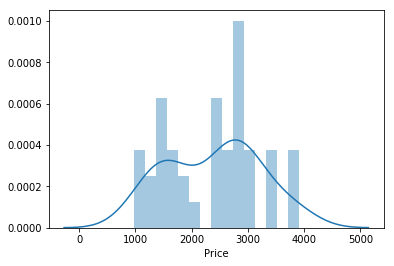

In [51]:
import seaborn as sns
sns.distplot(br_rent['Price'],bins=15)

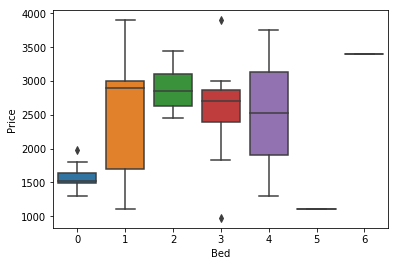

In [52]:
sns.boxplot(x='Bed', y= 'Price', data=br_rent)

### Map of Brooklyn apartments for rent

#### The popups will indicate the address and the monthly price for rent thus making it convenient to select the target appartment with the price condition estipulated (max 5000$)

In [53]:
# create map of Brooklyn using latitude and longitude values from Nominatim
latitude= 40.6501038
longitude= -73.9495823

map_brooklyn_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(br_rent['Lat'], br_rent['Long'],'$ ' + br_rent['Price'].astype(str)+ ',  '+ br_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn_rent) 
    

map_brooklyn_rent

### Map of Brooklyn showing the places for rent and the cluster of venues

#### Now, one can point to a rental place for price and address location information while knowing the cluster venues around it.
#### This is an insightful way to explore rental possibilites

In [82]:
# create map of Brooklyn using latitude and longitude values from Nominatim
latitude= 40.6501038
longitude= -73.9495823

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(br_rent['Lat'], br_rent['Long'],'$ ' + br_rent['Price'].astype(str)+ br_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_brooklyn_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_brooklyn_rent)

map_clusters2

## Now one can explore a particular rental place and its venues in detail
### In the map above, examination of appartments with rental place below 5000/month is straightforwad while knowing the venues around it.
### We could find an appartment with at the right price and in a location with desirable venues. The next step is to see if it is located near a subway metro station, in next cells work.

In [55]:
## kk is the cluster number to explore
kk = 0
merged.loc[merged['Cluster Labels'] == kk, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bensonhurst,Chinese Restaurant,Pizza Place,Bakery,Donut Shop,Italian Restaurant,Sushi Restaurant,Ice Cream Shop,Bridal Shop,Bagel Shop,Cha Chaan Teng
2,Sunset Park,Bank,Mexican Restaurant,Pizza Place,Bakery,Latin American Restaurant,Deli / Bodega,Pharmacy,Mobile Phone Shop,Fried Chicken Joint,Gym
4,Gravesend,Pizza Place,Lounge,Italian Restaurant,Bus Station,Bakery,Martial Arts Dojo,Men's Store,Bar,Electronics Store,Gym
5,Brighton Beach,Beach,Eastern European Restaurant,Russian Restaurant,Restaurant,Sushi Restaurant,Bank,Gourmet Shop,Mobile Phone Shop,Pharmacy,Fast Food Restaurant
7,Manhattan Terrace,Pizza Place,Ice Cream Shop,Donut Shop,Convenience Store,Bus Station,Steakhouse,Organic Grocery,Grocery Store,Bank,Bagel Shop
8,Flatbush,Pharmacy,Coffee Shop,Caribbean Restaurant,Mexican Restaurant,Bank,Plaza,Juice Bar,Pizza Place,Diner,Donut Shop
10,East Flatbush,Food & Drink Shop,Hardware Store,Moving Target,Fast Food Restaurant,Supermarket,Caribbean Restaurant,Chinese Restaurant,Park,Other Repair Shop,Wine Shop
11,Kensington,Grocery Store,Thai Restaurant,Ice Cream Shop,Pharmacy,Pizza Place,Donut Shop,Gas Station,Mobile Phone Shop,Racetrack,Pub
14,Brownsville,Restaurant,Chinese Restaurant,Park,Farmers Market,Fried Chicken Joint,Trail,Moving Target,Burger Joint,Caribbean Restaurant,Performing Arts Venue
25,Cypress Hills,Latin American Restaurant,Pizza Place,Fried Chicken Joint,Ice Cream Shop,Donut Shop,Fast Food Restaurant,Metro Station,South American Restaurant,Gas Station,Liquor Store


## Mapping Brooklyn Subway locations
### Brooklyn subway metro locations (address) was obtained from webscrapping sites such as Wikipedia, Google and NY Metro Transit.

In [56]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f0268f5427694229822068e876b514f6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='y0VFQievwxtqtC-cw3e5DRjxBeUhBSGPZ3aOfFJUkEhs',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f0268f5427694229822068e876b514f6.get_object(Bucket='machinelearning-donotdelete-pr-i10ri6kd8hceei',Key='Brooklyn_subway.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
name=[]
adres=[]
latitude=[]
longitude=[]

for i in range(len(df_data_0.Division)):
    name.append(df_data_0.Division[i].split(",")[1])
    adres.append(df_data_0.Division[i].split(",")[2])
    latitude.append(df_data_0.Division[i].split(",")[3])
    longitude.append(df_data_0.Division[i].split(",")[4])


In [57]:
column={'Station':name, 'Address': adres, 'Lat':latitude, 'Long':longitude}     
Brooklyn_subway = pd.DataFrame(data=column)
Brooklyn_subway.head()

,Station,Address,Lat,Long
0,4 Avenue,25th St,40.660397,-73.998091
1,4 Avenue,25th St,40.660397,-73.998091
2,4 Avenue,36th St,40.655144,-74.003549
3,4 Avenue,36th St,40.655144,-74.003549
4,4 Avenue,36th St,40.655144,-74.003549


In [58]:
# removing duplicate rows and creating new set brsub1
brsub1=Brooklyn_subway.drop_duplicates(subset=['Lat','Long'], keep="last").reset_index(drop=True)
brsub1.shape

(140, 4)

In [59]:
brsub1.head()

,Station,Address,Lat,Long
0,4 Avenue,25th St,40.660397,-73.998091
1,4 Avenue,36th St,40.655144,-74.003549
2,4 Avenue,45th St,40.648939,-74.010006
3,4 Avenue,53rd St,40.645069,-74.014034
4,4 Avenue,59th St,40.641362,-74.017881


In [73]:
brsub1

,Station,Address,Lat,Long
0,4 Avenue,25th St,40.660397,-73.998091
1,4 Avenue,36th St,40.655144,-74.003549
2,4 Avenue,45th St,40.648939,-74.010006
3,4 Avenue,53rd St,40.645069,-74.014034
4,4 Avenue,59th St,40.641362,-74.017881
5,4 Avenue,77th St,40.629742,-74.02551
6,4 Avenue,86th St,40.622687,-74.028398
7,4 Avenue,95th St,40.616622,-74.030876
8,4 Avenue,9th St,40.670847,-73.988302
9,4 Avenue,Bay Ridge Av,40.634967,-74.023377


### MAP of Brooklyn showing the location of subway stations

In [74]:
# map subway stations 
# create map of Brooklyn using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude= 40.6501038
longitude= -73.9495823

map_brsub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(brsub1['Lat'], brsub1['Long'], brsub1['Station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_brsub1) 
map_brsub1

RecursionError: maximum recursion depth exceeded

In [75]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Map of Brooklyn showing places for rent and the subway locations nearby
### Now, we can visualize the desirable rental places and their nearest subway station. Popups display rental address and monthly rental price and the subway station name.
#### Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a rental place to an specific subway station

In [76]:
br_rent.head()

,Name,Address,Postcode,Bed,Bath,SQRT,Price,Lat,Long
0,The Vitagraph,"1277 E 14th St,",11230,3,2,669,2850,40.618722,-73.960798
1,Leonard Pointe,"395 Leonard St,",11211,2,2,434,2793,40.718149,-73.948499
2,33 Bond St,"33 Bond St,",11201,2,2,511,3099,40.726154,-73.993471
3,Common Marcy,"207 S 3rd St,",11211,0,1,102,1975,40.711365,-73.959122
4,568 Union,"568 Union Ave,",11211,1,1,442,2900,40.717784,-73.951824


In [78]:
# create map of Brooklyn using latitude and longitude values from Nominatim
latitude= 40.6501038
longitude= -73.9495823

map_brooklyn_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(br_rent['Lat'], br_rent['Long'],'$ ' + br_rent['Price'].astype(str)+ ', '+ br_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(brsub1['Lat'], brsub1['Long'],  brsub1['Station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_brooklyn_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_brooklyn_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_brooklyn_rent)

map_brooklyn_rent

RecursionError: maximum recursion depth exceeded

# Results
## ONE CONSOLIDATE MAP
### Let's consolidate all the required inforamtion to make the apartment selection in one map
#### Map of Brooklyn with rental places, subway locations and cluster of venues
#### Red dots are Subway stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues

In [79]:
# create map of Brooklyn using latitude and longitude values from Nominatim
latitude= 40.6501038
longitude= -73.9495823

map_br_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(br_rent['Lat'], br_rent['Long'],'$ ' + br_rent['Price'].astype(str)+ ', '+br_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_br_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(brsub1['Lat'], brsub1['Long'],  brsub1['Station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_br_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_br_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_br_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_br_one)

map_br_one

RecursionError: maximum recursion depth exceeded

## Problem Resolution - Select the apartment for rent
### The above consolidate map was used to explore options.
#### After examining, I have chosen two locations that meet the requirements which will assess to make a choice.
- Apartment 1: Leonard Pointe, Cluster # 0 Monthly rent : 3445 Dollars

- Apartment 2: 544 Union, Cluster # 0 Monthly rent : 3440 Dollars

### Venues for Apartments - Cluster 0

In [80]:
## kk is the cluster number to explore
kk = 0
merged.loc[merged['Cluster Labels'] == kk, merged.columns[[1] + list(range(5, merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bensonhurst,Chinese Restaurant,Pizza Place,Bakery,Donut Shop,Italian Restaurant,Sushi Restaurant,Ice Cream Shop,Bridal Shop,Bagel Shop,Cha Chaan Teng
2,Sunset Park,Bank,Mexican Restaurant,Pizza Place,Bakery,Latin American Restaurant,Deli / Bodega,Pharmacy,Mobile Phone Shop,Fried Chicken Joint,Gym
4,Gravesend,Pizza Place,Lounge,Italian Restaurant,Bus Station,Bakery,Martial Arts Dojo,Men's Store,Bar,Electronics Store,Gym
5,Brighton Beach,Beach,Eastern European Restaurant,Russian Restaurant,Restaurant,Sushi Restaurant,Bank,Gourmet Shop,Mobile Phone Shop,Pharmacy,Fast Food Restaurant
7,Manhattan Terrace,Pizza Place,Ice Cream Shop,Donut Shop,Convenience Store,Bus Station,Steakhouse,Organic Grocery,Grocery Store,Bank,Bagel Shop
8,Flatbush,Pharmacy,Coffee Shop,Caribbean Restaurant,Mexican Restaurant,Bank,Plaza,Juice Bar,Pizza Place,Diner,Donut Shop
10,East Flatbush,Food & Drink Shop,Hardware Store,Moving Target,Fast Food Restaurant,Supermarket,Caribbean Restaurant,Chinese Restaurant,Park,Other Repair Shop,Wine Shop
11,Kensington,Grocery Store,Thai Restaurant,Ice Cream Shop,Pharmacy,Pizza Place,Donut Shop,Gas Station,Mobile Phone Shop,Racetrack,Pub
14,Brownsville,Restaurant,Chinese Restaurant,Park,Farmers Market,Fried Chicken Joint,Trail,Moving Target,Burger Joint,Caribbean Restaurant,Performing Arts Venue
25,Cypress Hills,Latin American Restaurant,Pizza Place,Fried Chicken Joint,Ice Cream Shop,Donut Shop,Fast Food Restaurant,Metro Station,South American Restaurant,Gas Station,Liquor Store


### Apartment Selection
Using the "one map" above, I was able to explore all possibilities since the popups provide the information needed for a good decision.
Both of apartments cost almost same. 
Based on current Istanbul venues, I feel that Cluster 0 type of venues is a closer resemblance to my current place. Also APARTMENT 2 is a better choice since the extra monthly rent is worth the conveniences it provides.
## DISCUSSION
In general, I am positively impressed with the overall organization, content and lab works presented during the Coursera IBM Certification Course
I feel this Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned.
I have created a good project that I can present as an example to show my potential.
I feel I have acquired a good starting point to become a professional Data Scientist and I will continue exploring to creating examples of practical cases.
## CONCLUSIONS
I feel rewarded with the efforts, time and money spent. I believe this course with all the topics covered is well worthy of appreciation.
This project has shown me a practical application to resolve a real situation that has impacting personal and financial impact using Data Science tools.
The mapping with Folium is a very powerful technique to consolidate information and make the analysis and decision thoroughly and with confidence. I would recommend for use in similar situations.
One must keep abreast of new tools for DS that continue to appear for application in several business fields.